# Voorbeeld 1:

Voor het eerste voorbeeld gaan we data gebruiken uit het artikel: _Comparative Study of Tumor Growth Based on Single Species Models_ gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
BIO Web of Conferences 97, 00118)

Hiervoor gaan we de echte data uit dit onderzoek gebruiken en kijken of één of meerdere van onze modellen hier een goeie fit op kan toepassen. Om te beginnen gaan we voor elk model de AIC-waarde berekenen om te kijken welke het meest geschikt is.

In [1]:
# De exacte data inladen:
import pandas as pd
from ode_solver import *

ts_exact = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs_exact = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts_exact, "$V$": Vs_exact}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,250,255,550,575,576,800,1050,1250,1750,2000,2550,2750,3000,3500,4000


In [2]:
# Voor elk model de AIC-waarde berekenen:
aantal_datapunten = len(Vs_exact)
Vs_scaled = [v / 100 for v in Vs_exact]

print("AIC-waarde per model:")
solver = ode_solver(Vs_scaled[0], 120, 1)
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Allee: {round(allee_aic, 3)}")


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Gompertz: {round(gompertz_aic, 3)}")


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Lineair: {round(lineair_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Logistisch: {round(logistisch_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Montroll: {round(montroll_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}")

AIC-waarde per model:
Allee: 198.76
Exponentieel afvlakkend: 167.009
Exponentieel toenemend: 181.602
Gompertz: 150.678
Lineair: 189.54
Lineair gelimiteerd: 183.248
Logistisch: 196.754
Mendelsohn: 122.418
Montroll: 213.722
Oppervlakte gelimiteerd: 149.763
Von Bertalanffy: 128.901


**OOK NOG BIC TOEVOEGEN**

De top 3 laagste AIC-waarden zijn:
 1. Mendelsohn (~122.418)
 2. Von Bertalanffy (~128.901)
 3. Oppervlakte gelimiteerd (~49.763)

 Dit betekent dat het Mendelsohn model het meest geschikte model is voor deze dataset. De volgende stap is om dit model samen met de data te plotten.

Mendelsohn: 113.629
{'c': 2.169754330321215, 'd': 0.6595358284157183}


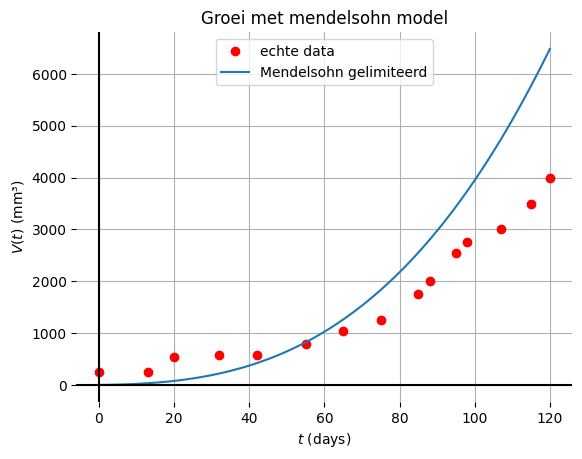

In [ ]:
testje = ode_solver(250, 120, 1)
params0 = {"c" : 0.0, "d" : 0}
params, mse = testje.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: testje.mendelsohn(c, d),
    params0 = params0
)
testje2_aic = testje.aic(mse, len(Vs_exact), len(params))
print(f"Mendelsohn: {round(testje2_aic, 3)}")

print(params)
dagen, volumes = testje.mendelsohn(**params)
volumes_scaled = [v / 100 for v in volumes]

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
plt.plot(dagen, volumes_scaled, label = "Mendelsohn gelimiteerd")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met mendelsohn model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()